In [1]:
import pandas as pd
import numpy as np
import sweetviz
import scipy
from scipy import stats
import subprocess
pd.options.display.max_columns = None


from tkinter import Tk

from tkinter.filedialog import askopenfilename



In [2]:
_filename_dwellings='Data/Жилые_Задача2.csv'
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
if askopenfilename()!='':
    _filename_dwellings = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(_filename_dwellings)

Data/Жилые_Задача2.csv


In [3]:
dwellings=pd.read_csv(_filename_dwellings)
dwellings

,Город,Id города,StableId,X,Y,Индекс,Название,Назначение,Название слоя,Застройщики,Субъект федерации,Район области,Район,Площадь,Этажность,Количество подъездов,Количество квартир,коэф семейности 2.7,Округ,Улица1,Дом1,Улица2,Дом2,Улица3,Дом3
0,Москва,4504222397630173,4504235282557431,37.544302,55.590103,117463,NaN,Жилой дом с административными помещениями,Жилые дома,NaN,Москва город федерального значения,NaN,Ясенево,29771,16,6,360,972,Юго-Западный административный округ,Инессы Арманд улица,8/17,Карамзина проезд,17,NaN,NaN
1,Москва,4504222397630173,4504235282557433,37.541573,55.590751,117463,NaN,Жилой дом с административными помещениями,Жилые дома,NaN,Москва город федерального значения,NaN,Ясенево,29771,16,3,360,972,Юго-Западный административный округ,Карамзина проезд,13 к1,NaN,NaN,NaN,NaN
2,Москва,4504222397630173,4504235282557434,37.538825,55.591416,117463,NaN,Жилой дом с административными помещениями,Жилые дома,NaN,Москва город федерального значения,NaN,Ясенево,29771,16,6,360,972,Юго-Западный административный округ,Карамзина проезд,9 к1,NaN,NaN,NaN,NaN
3,Москва,4504222397630173,4504235282557436,37.535992,55.592098,117463,NaN,Жилой дом с административными помещениями,Жилые дома,NaN,Москва город федерального значения,NaN,Ясенево,29766,16,6,360,972,Юго-Западный административный округ,Карамзина проезд,5,NaN,NaN,NaN,NaN
4,Москва,4504222397630173,4504235282557459,37.543789,55.591608,117463,NaN,Жилой дом,Жилые дома,NaN,Москва город федерального значения,NaN,Ясенево,36852,9,16,567,1531,Юго-Западный административный округ,Инессы Арманд улица,4 к1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,Москва,4504222397630173,4504235283050022,37.548619,55.616044,117593,NaN,Жилой дом с административными помещениями,Жилые дома,NaN,Москва город федерального значения,NaN,Ясенево,19976,16,4,256,691,Юго-Западный административный округ,Соловьиный проезд,4 к1,NaN,NaN,NaN,NaN
326,Москва,4504222397630173,4504235283050024,37.543529,55.618447,117593,NaN,Жилой дом,Жилые дома,NaN,Москва город федерального значения,NaN,Ясенево,19978,16,4,256,691,Юго-Западный административный округ,Айвазовского улица,1,NaN,NaN,NaN,NaN
327,Москва,4504222397630173,4504235283106596,37.485790,55.633614,117133,NaN,Жилой дом с административными помещениями,Жилые дома,NaN,Москва город федерального значения,NaN,Тёплый Стан,43535,16,5,311,840,Юго-Западный административный округ,Академика Виноградова улица,9,NaN,NaN,NaN,NaN
328,Москва,4504222397630173,4504235283114407,37.485010,55.632915,117133,NaN,Жилой дом с административными помещениями,Жилые дома,NaN,Москва город федерального значения,NaN,Тёплый Стан,44677,16,5,378,1021,Юго-Западный административный округ,Академика Виноградова улица,5,NaN,NaN,NaN,NaN


In [4]:
_filename_poi='Data/POI_Задача2.csv'
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
if askopenfilename()!='':
    _filename_poi = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(_filename_poi)


Data/POI_Задача2.csv


In [15]:
poi = pd.read_csv(_filename_poi)


poi_sorted=poi.copy().sort_values(by=['Rubric','Organization_name' ]).reset_index()



In [16]:
poi_sorted

,index,Id_card,Id_firm,Organization_name,Rubric,Project,Subject,district_ofsubject,city,index_of_city,post_index,street,house_num,houseId,Callphones,Email,Sites,SocialNetworks,how_to_pay,work_schedule,philial_amount,lat,lon
0,106,70000001029366385,4504137598354185,"Красное & белое, сеть магазинов",Алкогольные напитки|Магазины разливного пива|П...,Москва,Москва город федерального значения,NaN,Москва г.,Тёплый Стан,117465,Генерала Тюленева улица,29а,4504235282589232,NaN,NaN,www.krasnoeibeloe.ru,krasnoebeloe|krasnoebeloe|krasnoebeloe|krasnoe...,Наличный расчёт|Расчёт по картам,Понедельник: с 9:00 до 22:05|Вторник: с 9:00 д...,835,55.617273,37.489496
1,107,70000001036669765,4504137598354185,"Красное & белое, сеть магазинов",Алкогольные напитки|Продовольственные магазины,Москва,Москва город федерального значения,NaN,Москва г.,Тёплый Стан,117321,Профсоюзная улица,152 к2 ст2,4504235282569463,NaN,NaN,www.krasnoeibeloe.ru,krasnoebeloe|krasnoebeloe|krasnoebeloe|krasnoe...,Наличный расчёт|Расчёт по картам,Понедельник: с 9:00 до 22:05|Вторник: с 9:00 д...,835,55.622874,37.506404
2,108,70000001027922570,4504137598354185,"Красное & белое, сеть магазинов",Алкогольные напитки|Продовольственные магазины,Москва,Москва город федерального значения,NaN,Москва г.,Тёплый Стан,117465,Генерала Тюленева улица,41а,4504235282603289,NaN,NaN,www.krasnoeibeloe.ru,krasnoebeloe|krasnoebeloe|krasnoebeloe|krasnoe...,Наличный расчёт|Расчёт по картам,Понедельник: с 9:00 до 22:05|Вторник: с 9:00 д...,835,55.613858,37.494008
3,197,70000001041204533,70000001041204532,Пекарня,Быстрое питание|Хлебобулочные изделия,Москва,Москва город федерального значения,NaN,Москва г.,Ясенево,117588,Новоясеневский проспект,1Б к1,4504235310822427,NaN,NaN,NaN,NaN,Наличный расчёт,Понедельник: с 8:00 до 20:00|Вторник: с 8:00 д...,1,55.617806,37.511738
4,198,70000001041162411,70000001041162410,Пекарня,Быстрое питание|Хлебобулочные изделия,Москва,Москва город федерального значения,NaN,Москва г.,Ясенево,117588,Новоясеневский проспект,1Б к6,70030076162970480,NaN,NaN,NaN,NaN,Наличный расчёт,Понедельник: с 8:00 до 18:00|Вторник: с 8:00 д...,1,55.619235,37.511776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,154,70000001033148207,70000001033148206,"Магазин чая, кофе и шоколада",Чай / Кофе|Кондитерские изделия,Москва,Москва город федерального значения,NaN,Москва г.,Тёплый Стан,117133,Тёплый Стан улица,10,4504235282589660,+7-916-437-46-00,ochaykofe@yandex.ru,NaN,NaN,Наличный расчёт,Понедельник: с 10:00 до 20:00|Вторник: с 10:00...,1,55.629040,37.486104
315,90,70000001041101137,4504136498285097,"Кантата, сеть галерей чая, кофе и эксклюзивных...",Чай / Кофе|Кондитерские изделия|Сувенирные ком...,Москва,Москва город федерального значения,NaN,Москва г.,Ясенево,117588,Новоясеневский проспект,7,4504235283044653,+7-968-773-97-48|+7 (499) 709-80-74,hotline@cantata.ru,www.cantata.ru,ccantata|ccantata|ccantata,Наличный расчёт|Расчёт по картам,Понедельник: с 10:00 до 22:00|Вторник: с 10:00...,133,55.607389,37.532023
316,66,4504127908738351,4504136498471507,Детская школа искусств №11,Школы искусств,Москва,Москва город федерального значения,NaN,Москва г.,Ясенево,117463,Паустовского улица,5 к3,4504235282558091,+7 (495) 423-05-61|+7 (495) 426-16-27,dshi11@yandex.ru,11.arts.mos.ru,NaN,Оплата через банк,Понедельник: с 9:00 до 20:00|Вторник: с 9:00 д...,1,55.599269,37.544233
317,16,70000001038420800,70000001038409492,"London Express, лингвистическая школа",Языковые школы|Перевод с иностранных языков|Об...,Москва,Москва город федерального значения,NaN,Москва г.,Ясенево,117593,Соловьиный проезд,1,4504235282559923,+7 (499) 390-78-78,moscow@london-express.ru,moskva.london-express.ru,londonexpress_moscow|moskva.london-express.ru|...,Наличный расчёт|Расчёт по картам,Понедельник: с 10:00 до 22:00|Вторник: с 10:00...,2,55.619538,37.544286


In [5]:
_filename_rubrics='Data/Рубрики_Россия_01.20.csv'
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
if askopenfilename()!='':
    _filename_rubrics = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(_filename_rubrics)


Data/Рубрики_Россия_01.20.csv


In [6]:
rubrics=pd.read_csv(_filename_rubrics)
rubrics



,Код рубрики,Категория,Рубрика 2го уровня,Рубрика
0,537,Досуг / Развлечения / Общественное питание,Места отдыха / Развлекательные заведения,Аквапарки / Водные аттракционы
1,11648,Досуг / Развлечения / Общественное питание,Места отдыха / Развлекательные заведения,Акватеррариум
2,110358,Досуг / Развлечения / Общественное питание,Места отдыха / Развлекательные заведения,Аттракционы
3,100772,Досуг / Развлечения / Общественное питание,Места отдыха / Развлекательные заведения,Аэродинамические комплексы
4,24169,Досуг / Развлечения / Общественное питание,Места отдыха / Развлекательные заведения,Ботанический сад / Дендрарий
...,...,...,...,...
81,234,Образование / Работа / Карьера,Дополнительное образование / Развивающие курсы,Профессиональная переподготовка / Повышение кв...
82,50532,Образование / Работа / Карьера,Дополнительное образование / Развивающие курсы,Театральные курсы
83,518,Образование / Работа / Карьера,Дополнительное образование / Развивающие курсы,Школы искусств
84,19499,Торговые комплексы / Спецмагазины,Торговые комплексы,Торгово-развлекательные центры / Моллы


In [38]:
column_names = ["Dataset"]
newDatasets=pd.DataFrame(columns=column_names)
for i in range(len(poi_sorted)):
    for j in range(len(rubrics)-1):
        newDataset=pd.DataFrame(columns=poi_sorted.columns)
        for k in range(len(poi_sorted['Rubric'][i].split('|'))):
            if poi_sorted['Rubric'][i].split('|')[k] in rubrics.Рубрика[j]:
                
    newDatasets.add(newDataset)
                                      
                                     
#my_report = sweetviz.compare([citizens, "Train"], [poi, "Test"], "Survived")
#my_report.show_html("Report.html") 

In [39]:
newDatasets


,Dataset


In [7]:

 
 
    def make_agg_count(df_in, group_col_name, stat_col_name):
        res = df_in.copy()
        res['X']=df['X']
        res['Y']=df['Y']
        
        # то же самое что и count, количество
        res['col_count'] = df.groupby(by=[group_col_name], as_index=False)[stat_col_name].transform(lambda s: s.values.shape[0])
        return res
    
    def make_agg_mean(df_in, group_col_name, stat_col_name):
        res = df_in.copy()
        res['X']=df['X']
        res['Y']=df['Y']
        # среднее значение по сгруппированному столбцу
        res['col_mean'] = df.groupby(by=[group_col_name], as_index=False)[stat_col_name].transform(lambda s: np.mean(s.values))
        return res
    def make_agg_median(df_in, group_col_name, stat_col_name):
        res = df_in.copy()
        res['X']=df['X']
        res['Y']=df['Y']
       # медиана по сгруппированному столбцу
        res['col_median'] = df.groupby(by=[group_col_name], as_index=False)[stat_col_name].transform(lambda s: np.median(s.values))
        return res
    def make_agg_sum(df_in, group_col_name, stat_col_name):
        res = df_in.copy()
        res['X']=df['X']
        res['Y']=df['Y']
       # сумма по сгруппированному столбцу
        res['col_sum'] = df.groupby(by=[group_col_name], as_index=False)[stat_col_name].transform(lambda s: np.sum(s.values))
        return res
    def make_agg_max(df_in, group_col_name, stat_col_name):
        res = df_in.copy()
        res['X']=df['X']
        res['Y']=df['Y']
      # максимум по сгруппированному столбцу
        res['col_max'] = df.groupby(by=[group_col_name], as_index=False)[stat_col_name].transform(lambda s: np.max(s.values))
        return res
    def make_agg_min(df_in, group_col_name, stat_col_name):
        res = df_in.copy()
        res['X']=df['X']
        res['Y']=df['Y']
        # минимум по сгруппированному столбцу
        res['col_min'] = df.groupby(by=[group_col_name], as_index=False)[stat_col_name].transform(lambda s: np.min(s.values))
        return res
    
    def make_k_familiness(df_in,flats_col_name,family_col_name):
        res=df_in.copy()
        res['amountofpeople']=res[flats_col_name]*res[family_col_name]
        return res
        # стандартное отклонение по сгруппированному столбцу
        #df['col_std'] = df.groupby(by=[group_col_name], as_index=False)[stat_col_name].transform(lambda s: np.std(s.values))
        # квантили в 20 и 80 % по сгруппированному столбцу
        # df['col_q20'] = df.groupby(by=[group_col_name], as_index=False)[stat_col_name].transform(lambda s: np.quantile(s.values, q=0.2))
        #df['col_q80'] = df.groupby(by=[group_col_name], as_index=False)[stat_col_name].transform(lambda s: np.quantile(s.values, q=0.8))
        # skew
        #df['col_skew'] = df.groupby(by=[group_col_name], as_index=False)[stat_col_name].transform(lambda s: scipy.stats.skew(s))
 
       
 
result = make_k_familiness(dwellings,'Количество квартир', 'коэф семейности 2.7')
result

#resultsum=make_agg_sum(result,'amountofpeople',)

,Город,Id города,StableId,X,Y,Индекс,Название,Назначение,Название слоя,Застройщики,Субъект федерации,Район области,Район,Площадь,Этажность,Количество подъездов,Количество квартир,коэф семейности 2.7,Округ,Улица1,Дом1,Улица2,Дом2,Улица3,Дом3,amountofpeople
0,Москва,4504222397630173,4504235282557431,37.544302,55.590103,117463,NaN,Жилой дом с административными помещениями,Жилые дома,NaN,Москва город федерального значения,NaN,Ясенево,29771,16,6,360,972,Юго-Западный административный округ,Инессы Арманд улица,8/17,Карамзина проезд,17,NaN,NaN,349920
1,Москва,4504222397630173,4504235282557433,37.541573,55.590751,117463,NaN,Жилой дом с административными помещениями,Жилые дома,NaN,Москва город федерального значения,NaN,Ясенево,29771,16,3,360,972,Юго-Западный административный округ,Карамзина проезд,13 к1,NaN,NaN,NaN,NaN,349920
2,Москва,4504222397630173,4504235282557434,37.538825,55.591416,117463,NaN,Жилой дом с административными помещениями,Жилые дома,NaN,Москва город федерального значения,NaN,Ясенево,29771,16,6,360,972,Юго-Западный административный округ,Карамзина проезд,9 к1,NaN,NaN,NaN,NaN,349920
3,Москва,4504222397630173,4504235282557436,37.535992,55.592098,117463,NaN,Жилой дом с административными помещениями,Жилые дома,NaN,Москва город федерального значения,NaN,Ясенево,29766,16,6,360,972,Юго-Западный административный округ,Карамзина проезд,5,NaN,NaN,NaN,NaN,349920
4,Москва,4504222397630173,4504235282557459,37.543789,55.591608,117463,NaN,Жилой дом,Жилые дома,NaN,Москва город федерального значения,NaN,Ясенево,36852,9,16,567,1531,Юго-Западный административный округ,Инессы Арманд улица,4 к1,NaN,NaN,NaN,NaN,868077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,Москва,4504222397630173,4504235283050022,37.548619,55.616044,117593,NaN,Жилой дом с административными помещениями,Жилые дома,NaN,Москва город федерального значения,NaN,Ясенево,19976,16,4,256,691,Юго-Западный административный округ,Соловьиный проезд,4 к1,NaN,NaN,NaN,NaN,176896
326,Москва,4504222397630173,4504235283050024,37.543529,55.618447,117593,NaN,Жилой дом,Жилые дома,NaN,Москва город федерального значения,NaN,Ясенево,19978,16,4,256,691,Юго-Западный административный округ,Айвазовского улица,1,NaN,NaN,NaN,NaN,176896
327,Москва,4504222397630173,4504235283106596,37.485790,55.633614,117133,NaN,Жилой дом с административными помещениями,Жилые дома,NaN,Москва город федерального значения,NaN,Тёплый Стан,43535,16,5,311,840,Юго-Западный административный округ,Академика Виноградова улица,9,NaN,NaN,NaN,NaN,261240
328,Москва,4504222397630173,4504235283114407,37.485010,55.632915,117133,NaN,Жилой дом с административными помещениями,Жилые дома,NaN,Москва город федерального значения,NaN,Тёплый Стан,44677,16,5,378,1021,Юго-Западный административный округ,Академика Виноградова улица,5,NaN,NaN,NaN,NaN,385938


In [9]:

#result.to_csv('../assets/new/test.csv')

newresult=pd.DataFrame()
newresult['x']=result['X']
newresult['y']=result['Y']
newresult['value']=result['amountofpeople']
#newresult.to_json('../map/data/citizensdone.json')
#host = "5432"
#username = "postgres"
#dbname = "web-map"

#table_name = "vitizenstest"
#file_name = result.to_csv('../map/data/test.csv')

#result

AssertionError: passed axis not bound to passed figure

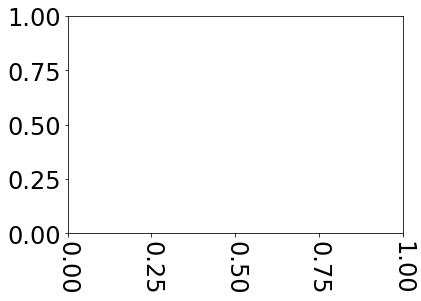

In [98]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
import matplotlib.pyplot as plt
params = {'axes.titlesize':'32',
          'xtick.labelsize':'24',
          'ytick.labelsize':'24'}

matplotlib.rcParams.update(params)

ax = fig.gca()
plt.xticks(rotation=270)
poi_sorted['Rubric'].hist(ax = ax)
fig.savefig('../assets/histograms/rubricshistogram.png')

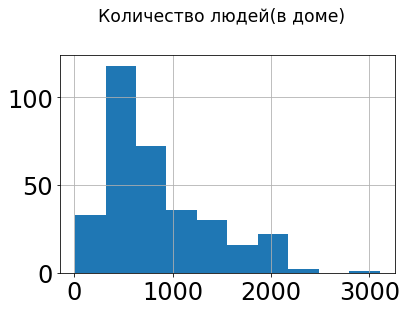

In [99]:

plt.suptitle('Количество людей(в доме)',x=0.5, y=1.05, ha='center',fontsize='xx-large')
#dwellings info
h = result['коэф семейности 2.7'].hist()
fig = h.get_figure()
fig.savefig('../assets/histograms/dwellings/family_ratio_histogram.png')

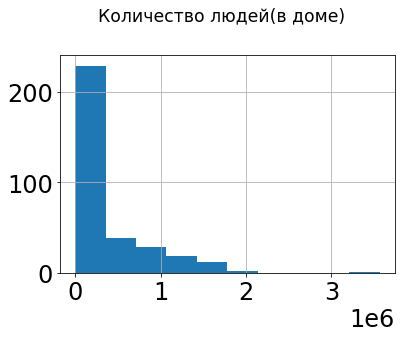

In [71]:
plt.suptitle('Количество людей(в доме)',x=0.5, y=1.05, ha='center',fontsize='xx-large')
h = result['amountofpeople'].hist()
fig = h.get_figure()
fig.savefig('../assets/histograms/dwellings/amountofpeople_histogram.png')

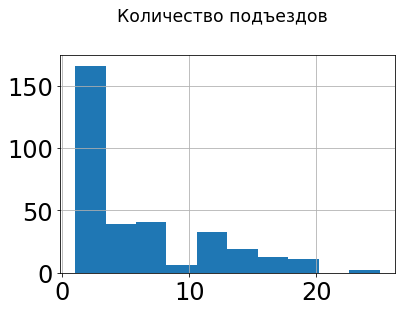

In [73]:
plt.suptitle('Количество подъездов',x=0.5, y=1.05, ha='center',fontsize='xx-large')
h = result['Количество подъездов'].hist()
fig = h.get_figure()
h.figure.savefig('../assets/histograms/dwellings/amountofentrances_histogram.pdf')
fig.savefig('../assets/histograms/dwellings/amountofentrances_histogram.png')

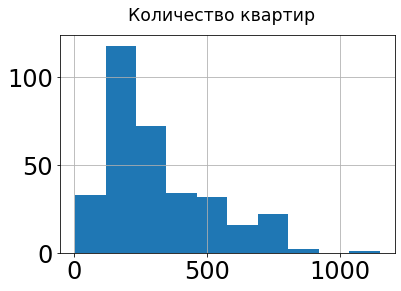

In [95]:
plt.suptitle('Количество квартир', ha='center',fontsize='xx-large')
result['Количество квартир'].hist()
fig.savefig('../assets/histograms/dwellings/amountoffloors_histogram.png')

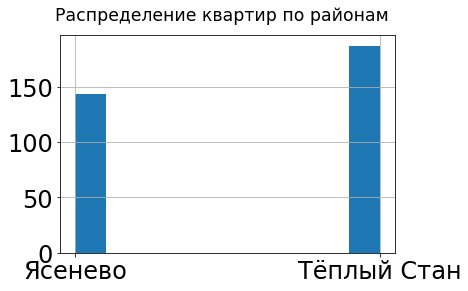

In [94]:
plt.suptitle('Распределение квартир по районам', ha='center',fontsize='xx-large')
result['Район'].hist()
fig.savefig('../assets/histograms/dwellings/district_histogram.png')

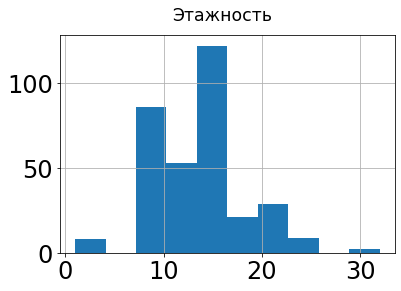

In [96]:
plt.suptitle('Этажность', ha='center',fontsize='xx-large')

h=result['Этажность'].hist()
fig = h.get_figure()

fig.savefig('../assets/histograms/dwellings/amountoffloors_histogram.png')

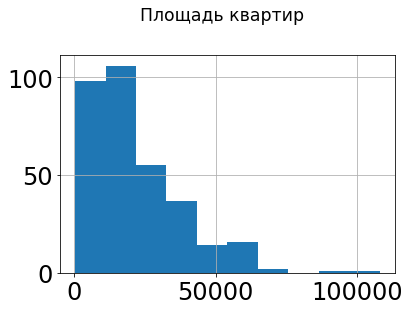

In [88]:
plt.suptitle('Площадь квартир',x=0.5, y=1.05, ha='center',fontsize='xx-large')
h=result['Площадь'].hist()
fig = h.get_figure()
fig.savefig('../assets/histograms/dwellings/s_histogram.png')

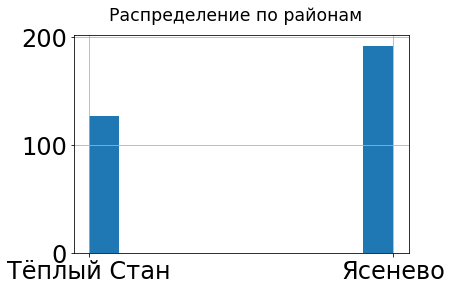

In [100]:
plt.suptitle('Распределение по районам', ha='center',fontsize='xx-large')
poi_sorted['index_of_city'].hist()
fig.savefig('../assets/histograms/poi/districtshistogram.png')

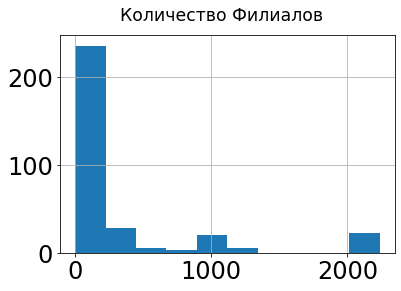

In [93]:
plt.suptitle('Количество Филиалов', ha='center',fontsize='xx-large')
poi_sorted['philial_amount'].hist()
fig.savefig('../assets/histograms/poi/philial_amounthistogram.png')